In [2]:
import sys
!{sys.executable} -m pip install pandasql

## Movies dataset description:
- This dataset contains information about 40 popular movies, with the following columns:

# Columns: 
- Title: The name of the movie
- Year: Release year of the movie
- Genre: Primary genre of the movie
- Director: Director(s) of the movie

## Data that needs to be analyzed:
- How many movies are there in each genre?
- Which director(s) appear most frequently in the dataset?
- How many movies were released per decade?
- Which year had the most movies on this list?
- What genres does each director typically work in?
- Who are the most diverse directors in terms of genre?

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pandasql as psql

In [5]:
df = pd.read_csv("movies_list.csv")

In [6]:
df

,Title,Year,Genre,Director
0,The Shawshank Redemption,1994,Drama,Frank Darabont
1,The Godfather,1972,Crime,Francis Ford Coppola
2,The Dark Knight,2008,Action,Christopher Nolan
3,Pulp Fiction,1994,Crime,Quentin Tarantino
4,Schindler's List,1993,Biography,Steven Spielberg
5,Forrest Gump,1994,Drama,Robert Zemeckis
6,Inception,2010,Sci-Fi,Christopher Nolan
7,Fight Club,1999,Drama,David Fincher
8,The Matrix,1999,Sci-Fi,Lana & Lilly Wachowski
9,Goodfellas,1990,Biography,Martin Scorsese


In [10]:
df.shape

(49, 4)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     49 non-null     object
 1   Year      49 non-null     int64 
 2   Genre     49 non-null     object
 3   Director  49 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


## Goal 1: How many movies are there in each genre?

In [15]:
df_genre = df.groupby("Genre")["Title"].count().reset_index()

In [17]:
df_genre

,Genre,Title
0,Action,7
1,Adventure,5
2,Animation,3
3,Biography,4
4,Comedy,1
5,Crime,6
6,Drama,10
7,Horror,1
8,Musical,1
9,Romance,2


In [19]:
df_genre1 = df_genre.sort_values(by = "Title", ascending = False)

In [21]:
df_genre1

,Genre,Title
6,Drama,10
0,Action,7
5,Crime,6
10,Sci-Fi,6
1,Adventure,5
3,Biography,4
2,Animation,3
9,Romance,2
11,Thriller,2
4,Comedy,1


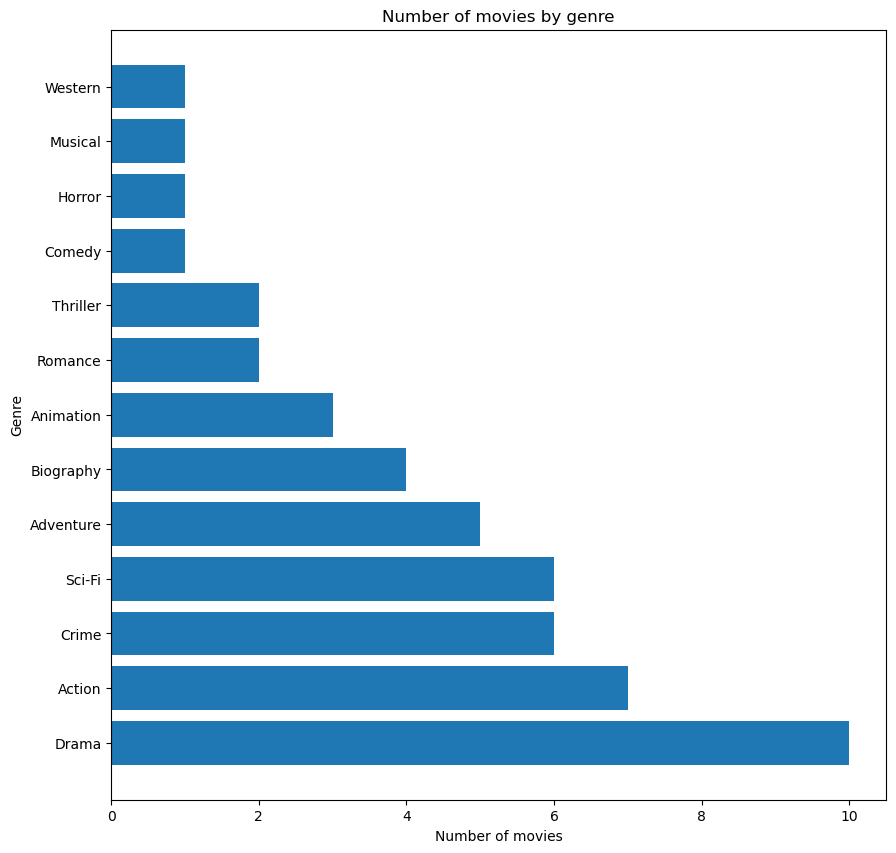

In [23]:
plt.figure(figsize=(10, 10))
plt.barh(df_genre1["Genre"], df_genre1["Title"])
plt.xlabel("Number of movies")
plt.ylabel("Genre")
plt.title("Number of movies by genre")
plt.show()

## Conclusions: 

- The genre with the most movies is the drama genre.
- next to it are the Action genre, crime genre and sci-fi genre.
- From this information, we can confirm that a lot of people love movies that talk about human experiences, movies that have physical 
and mental challenges, movies that is full of thrills, suspense and the complex aspects of the human condition and movies that have futuristic
and mythological aspects.

## Goal 2: Which year had the most movies on this list?

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     49 non-null     object
 1   Year      49 non-null     int64 
 2   Genre     49 non-null     object
 3   Director  49 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


In [30]:
df_year = df.groupby("Year")["Title"].count().reset_index()

In [31]:
df_year

,Year,Title
0,1942,1
1,1957,1
2,1972,1
3,1977,1
4,1979,1
5,1980,2
6,1990,1
7,1991,1
8,1993,1
9,1994,4


In [33]:
df_year1 = df_year.sort_values(by = "Title", ascending = False)

In [34]:
df_year1

,Year,Title
9,1994,4
28,2019,3
24,2014,3
15,2001,3
13,1999,3
12,1998,2
26,2016,2
25,2015,2
21,2010,2
20,2009,2


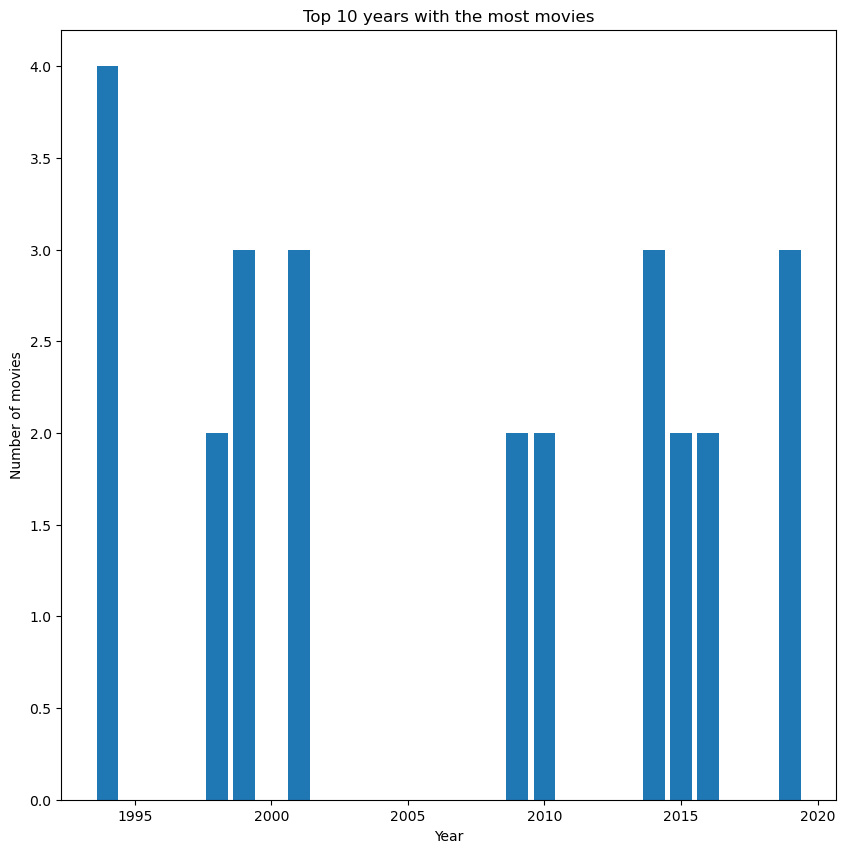

In [36]:
plt.figure(figsize=(10, 10))
plt.bar(df_year1["Year"][:10], df_year1["Title"][:10])
plt.xlabel("Year", size = 10)
plt.ylabel("Number of movies")
plt.title("Top 10 years with the most movies")
plt.show()

## Conclusions:
- 1994 stands out with the most movies released.(4 movies)
- 1999, 2001, 2014, 2019 have 3 movies released, indicating peaks in those years.

## Goal 3: How many movies were released per decade

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     49 non-null     object
 1   Year      49 non-null     int64 
 2   Genre     49 non-null     object
 3   Director  49 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


In [42]:
df ["Decade"] = ((df["Year"] // 10) * 10).astype("str") + "s"

In [43]:
df

,Title,Year,Genre,Director,Decade
0,The Shawshank Redemption,1994,Drama,Frank Darabont,1990s
1,The Godfather,1972,Crime,Francis Ford Coppola,1970s
2,The Dark Knight,2008,Action,Christopher Nolan,2000s
3,Pulp Fiction,1994,Crime,Quentin Tarantino,1990s
4,Schindler's List,1993,Biography,Steven Spielberg,1990s
5,Forrest Gump,1994,Drama,Robert Zemeckis,1990s
6,Inception,2010,Sci-Fi,Christopher Nolan,2010s
7,Fight Club,1999,Drama,David Fincher,1990s
8,The Matrix,1999,Sci-Fi,Lana & Lilly Wachowski,1990s
9,Goodfellas,1990,Biography,Martin Scorsese,1990s


In [44]:
df[["Decade", "Title"]]

,Decade,Title
0,1990s,The Shawshank Redemption
1,1970s,The Godfather
2,2000s,The Dark Knight
3,1990s,Pulp Fiction
4,1990s,Schindler's List
5,1990s,Forrest Gump
6,2010s,Inception
7,1990s,Fight Club
8,1990s,The Matrix
9,1990s,Goodfellas


In [45]:
df_decade = df.groupby("Decade")["Title"].count().reset_index()

In [46]:
df_decade

,Decade,Title
0,1940s,1
1,1950s,1
2,1970s,3
3,1980s,2
4,1990s,15
5,2000s,12
6,2010s,15


In [47]:
df_decade1 = df_decade.sort_values(by = "Title", ascending = False)

In [48]:
df_decade1

,Decade,Title
4,1990s,15
6,2010s,15
5,2000s,12
2,1970s,3
3,1980s,2
0,1940s,1
1,1950s,1


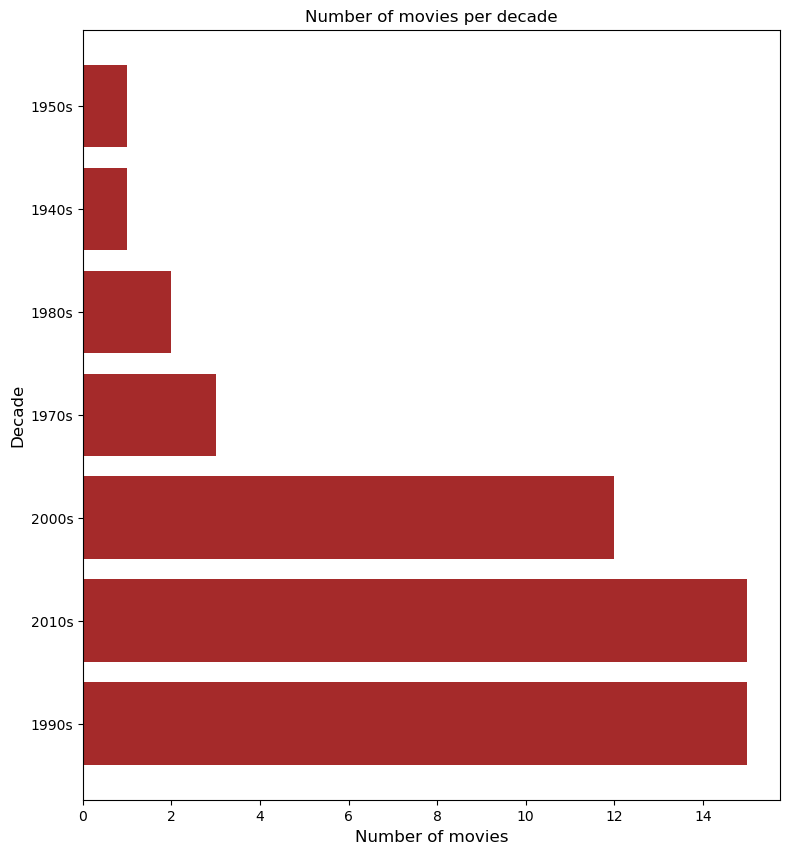

In [49]:
plt.figure(figsize=(9, 10))
plt.barh(df_decade1["Decade"], df_decade1["Title"], color = "brown")
plt.xlabel("Number of movies", size = 12)
plt.ylabel("Decade", size = 12)
plt.title("Number of movies per decade")
plt.show()

# Conclusions:
- The 1990s and the 2010s are the decades with the most movies released.
- Followed closely by the 2000s with 12 movies released.
- Earlier decades (1970s, 1980s, 1940s and 1950s) have fewer movies than recent decades.
- This shows that Film technology and equipement improve as time progresses, making movie production more accessible which results in a greater output in movies in recent decades.

## Goal 4: Which director(s) appear most frequently in the dataset?

In [54]:
df

,Title,Year,Genre,Director,Decade
0,The Shawshank Redemption,1994,Drama,Frank Darabont,1990s
1,The Godfather,1972,Crime,Francis Ford Coppola,1970s
2,The Dark Knight,2008,Action,Christopher Nolan,2000s
3,Pulp Fiction,1994,Crime,Quentin Tarantino,1990s
4,Schindler's List,1993,Biography,Steven Spielberg,1990s
5,Forrest Gump,1994,Drama,Robert Zemeckis,1990s
6,Inception,2010,Sci-Fi,Christopher Nolan,2010s
7,Fight Club,1999,Drama,David Fincher,1990s
8,The Matrix,1999,Sci-Fi,Lana & Lilly Wachowski,1990s
9,Goodfellas,1990,Biography,Martin Scorsese,1990s


In [55]:
df_director = df.groupby("Director")["Title"].count().reset_index()

In [56]:
df_director

,Director,Title
0,Alejandro G. Iñárritu,1
1,Ang Lee,1
2,Anthony & Joe Russo,1
3,Bong Joon-ho,1
4,Bryan Singer,1
5,Christopher Nolan,4
6,Damien Chazelle,2
7,David Fincher,3
8,Denis Villeneuve,1
9,Francis Ford Coppola,1


In [64]:
df_director1 = """SELECT Director, Title FROM df_director
ORDER BY Title desc"""

In [70]:
df_director2 = psql.sqldf(df_director1, globals())

In [72]:
df_director2

,Director,Title
0,Christopher Nolan,4
1,David Fincher,3
2,Martin Scorsese,3
3,Damien Chazelle,2
4,Frank Darabont,2
5,James Cameron,2
6,Peter Jackson,2
7,Quentin Tarantino,2
8,Ridley Scott,2
9,Steven Spielberg,2


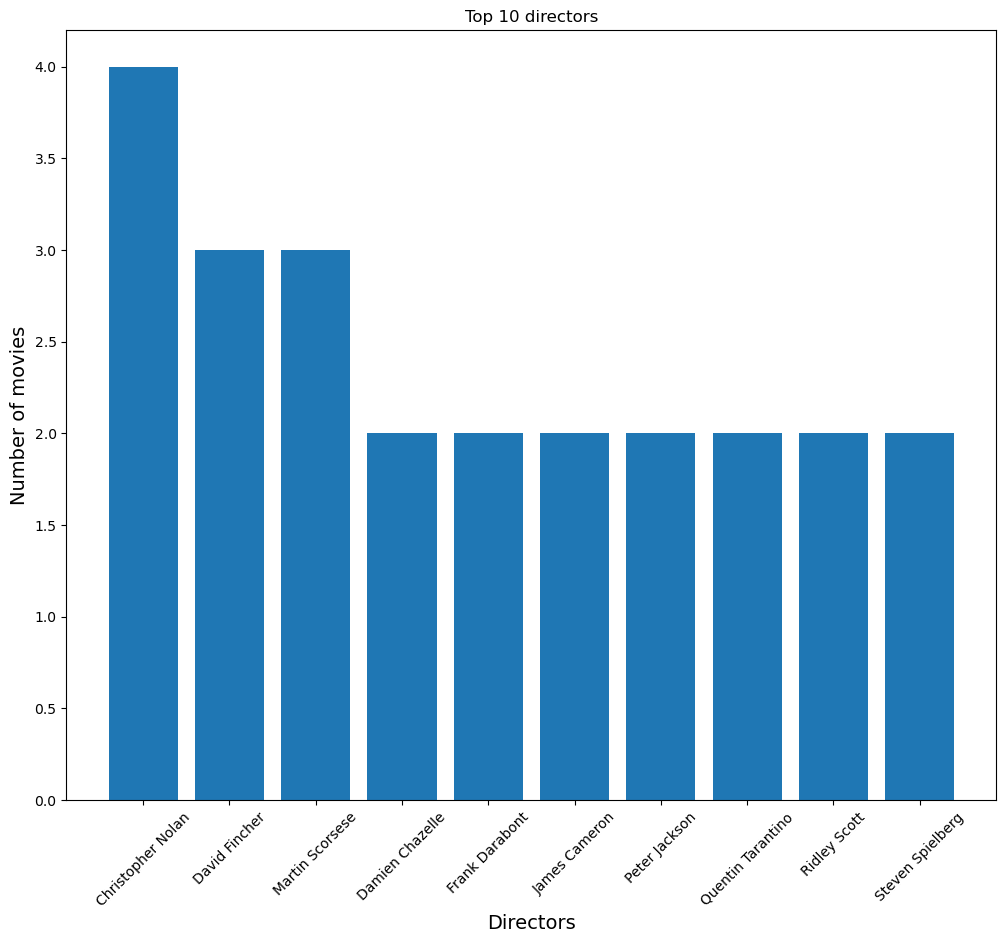

In [90]:
plt.figure(figsize=(12, 10))
plt.bar(df_director2["Director"][:10], df_director2["Title"][:10])
plt.xlabel("Directors", size= 14)
plt.xticks(rotation = 45)
plt.ylabel("Number of movies", size= 14)
plt.title("Top 10 directors")
plt.show()

In [122]:
df.loc[df["Director"].isin(["Christopher Nolan", "David Fincher", "Martin Scorsese" ,"Damien Chazelle", 
                            "Frank Darabont", "James Cameron", "Peter Jackson", "Quentin Tarantino", "Ridley Scott", "Steven Spielberg"])].sort_values(by = "Director")

,Title,Year,Genre,Director,Decade
18,Interstellar,2014,Sci-Fi,Christopher Nolan,2010s
2,The Dark Knight,2008,Action,Christopher Nolan,2000s
28,The Prestige,2006,Drama,Christopher Nolan,2000s
6,Inception,2010,Sci-Fi,Christopher Nolan,2010s
29,Whiplash,2014,Drama,Damien Chazelle,2010s
27,La La Land,2016,Musical,Damien Chazelle,2010s
7,Fight Club,1999,Drama,David Fincher,1990s
39,The Social Network,2010,Drama,David Fincher,2010s
15,Se7en,1995,Crime,David Fincher,1990s
19,The Green Mile,1999,Drama,Frank Darabont,1990s


## Conclusions: 

- Christopher Nolan stands out with 4 movies (Interstellar, The Dark knight, The Prestige, Inception).
- David Fincher and Martin Scorsese stand out with 3 movies respectively:
- - David Fincher: Fight club, Social network and Se7en.
  - Martin Scorsese: Wolf of wall street, Goodfellas, Departed.
- Damien Chazelle, Frank Darabont, James Cameron, Peter Jackson, Quentin Tarantino, Ridley Scott and Steven Spielberg stand out with 2 movies respectively. 

## Goal 5: Who are the most diverse directors in terms of genre?

## Conclusions:
- Christopher Nolan is the most diverse director with 3 genres: Sci fi, Drama and Action.

## Goal 6: What genres does each director typically work in?

## Conclusions: 
- Frank Darabont's work focuses on Drama.
- Peter Jackson's work focuses on Adventure and wonder.
- Martin Scorsese's work focuses on Biography and tales of real rises to power.
- David Fincher's work focuses on Drama.